In [30]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [31]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif)

# Functions

In [32]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [33]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [34]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [35]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [36]:
meta_div <- meta_div[ !is.na(meta_div$CD3), ]

In [37]:
meta_div <- meta_div[ meta_div$cancergroup != "Normal", ]
meta_div <- meta_div[ meta_div$cancergroup != "LFS", ]

In [38]:
meta_div$cancergroup[ which(meta_div$cancergroup == "Solid")] <- "Solid tumors"

In [39]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]

In [40]:
dim(pbmc)

[1] 456  63

In [41]:
names(group_col)[ names(group_col) == "Solid"] <- "Solid tumors"

In [42]:
pbmc <- pbmc[ pbmc$CD3 > 0,]

ridgeplot

In [43]:
library(ggridges)

In [44]:
pbmc$cancergroup <- factor(pbmc$cancergroup, levels = c("Solid tumors", "Leukemia", "Lymphoma"))

In [45]:
ridgeplot.fx <- function(df, x, y, myfill, grids, myxlab){
    p <- ggplot(df, aes(x = eval(as.name(x)), y = eval(as.name(y)), fill = eval(as.name(myfill)))) +
  geom_density_ridges(alpha = 0.2, scale = 1, from = 0, to = 100) +
  theme_ridges(font_size = 13, grid = eval(grids)) + 
  theme(axis.title.y = element_blank(), legend.position = "none") + labs(x = myxlab)
  return(p)
}

In [46]:
# pTE <- ridgeplot.fx(pbmc, "percent_TE", "cycle", "cancergroup", "TRUE", "Percent TE")

In [47]:
# pEM <- ridgeplot.fx(pbmc, "percent_EM", "cycle", "cancergroup", "TRUE", "Percent EM")
# pCM <- ridgeplot.fx(pbmc, "percent_CM", "cycle", "cancergroup", "TRUE", "Percent CM")
# pSCM <- ridgeplot.fx(pbmc, "percent_SCM", "cycle", "cancergroup", "TRUE", "Percent SCM")
# pN <- ridgeplot.fx(pbmc, "percent_Naive", "cycle", "cancergroup", "TRUE", "Percent Naive")

In [48]:
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend




In [50]:
# allp <- plot_grid(pN, pSCM, pCM, pEM, pTE, nrow = 1)

In [ ]:
# pdf(paste0(plotpath, "Flow_overview.pdf"), width = 10, height = 4)
# allp
# dev.off()

pdf 
  2

one plot with facet so the plots align well

In [51]:
colnames(pbmc)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "TRB"                "Reads"             
[43] "CPKR"               "Average_reads"      "VMR"               
[46] "Max_reads"          "Singletons"         "Doubletons"        
[49] "qD"                 "Sample_Coverage"    "observed_Richness" 
[52] "estimated_Richness" "SE_Richeness"       "observed_Shannon"  
[55] "estimated_Shannon"  "SE_Shannon"         "observed_Simpson"  
[58] "estimated_Simpson"  "SE_Simpson"         "file"              
[61] "basename"           "Group"              "sampletype"

In [53]:
# melt
pbmc_m <- reshape2::melt(pbmc, id.vars = c("cancergroup", "cycle"), measure.vars = c("Naïve%", "SCM%", "CM%", "EM%", "TE%"))

In [54]:
head(pbmc_m)

,cancergroup,cycle,variable,value
,<fct>,<chr>,<fct>,<dbl>
1,Solid tumors,X02,Naïve%,0.0000000
2,Solid tumors,X03,Naïve%,0.2424242
3,Solid tumors,X04,Naïve%,1.5313936
4,Solid tumors,X05,Naïve%,1.2315271
5,Solid tumors,X01,Naïve%,94.6624804
6,Leukemia,X01,Naïve%,21.1640212


In [55]:
myp <- ggplot(pbmc_m, aes(x = value, y = cycle, fill = cancergroup)) +
  geom_density_ridges(
    alpha = 0.4, from = 0, to = 100,
    scale = 1,
    panel_scaling = TRUE,
    quantile_lines = FALSE, size = 0.2
  
  ) +
  theme_ridges(font_size = 13, grid = TRUE) +
  facet_wrap(~variable, nrow = 1, scales = "free_x", strip.position = "bottom") +
  theme(axis.title = element_blank(),
    legend.position = "bottom",
    strip.background.x = element_blank(),
    strip.placement = "outside"
  )


Picking joint bandwidth of 8.41

Picking joint bandwidth of 2.74

Picking joint bandwidth of 7.53

Picking joint bandwidth of 1.73

Picking joint bandwidth of 13.3



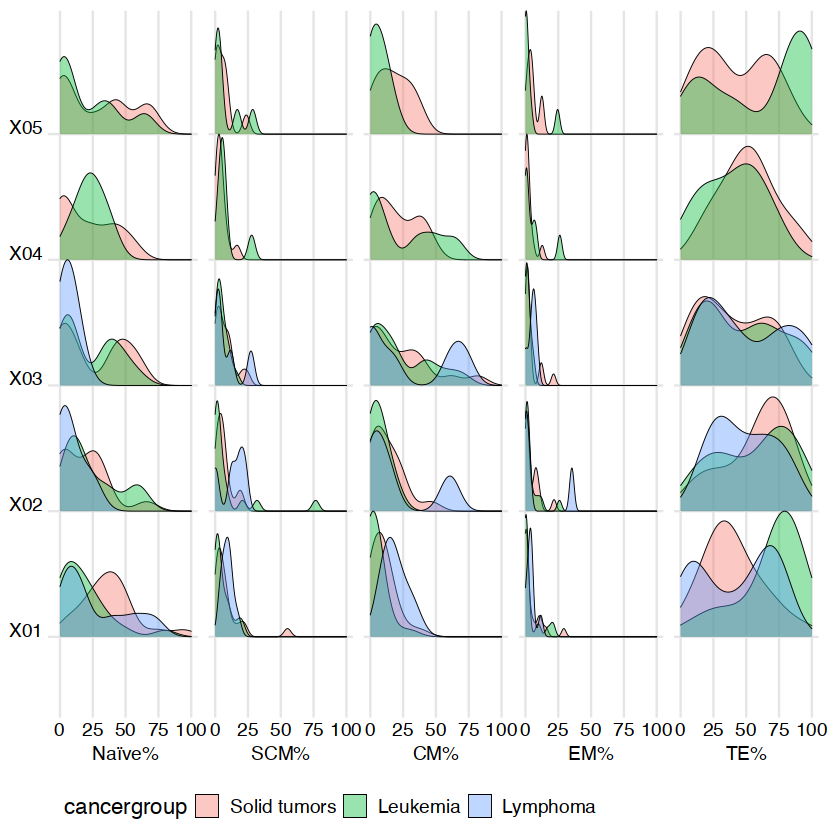

In [56]:
myp

In [57]:
pdf(paste0(plotpath, "Flow_overview.pdf"), width = 8, height = 4)
myp
dev.off()

Picking joint bandwidth of 8.41

Picking joint bandwidth of 2.74

Picking joint bandwidth of 7.53

Picking joint bandwidth of 1.73

Picking joint bandwidth of 13.3



pdf 
  2